In [1]:
from sklearn.datasets import load_wine
import pandas as pd
# Read the wine dataset 
dataset = load_wine() 
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names']) 
df = df.assign(target=pd.Series(dataset['target']).values)

c:\Users\amits\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# Filter the irrelevant columns 
df = df[['alcohol', 'magnesium', 'target']] 
# Filter the irrelevant label 
df = df[df.target != 0]

In [10]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=30, random_state=3)

## q1

In [32]:
import matplotlib.pyplot as plt

def display_scatter(df, title):
    winery_1 = df[df['target'] == 1]
    plt.scatter(winery_1['alcohol'], winery_1['magnesium'], c='mediumslateblue', label='Winery 1')
    winery_2 = df[df['target'] == 2]
    plt.scatter(winery_2['alcohol'], winery_2['magnesium'], c='limegreen', label='Winery 2')

    plt.xlabel('Alcohol')
    plt.ylabel('Magnesium', rotation='horizontal', labelpad=30)
    plt.title('Wineries alcohol and magnesium distribution\nfor ' + title)
    plt.legend()
    plt.show()


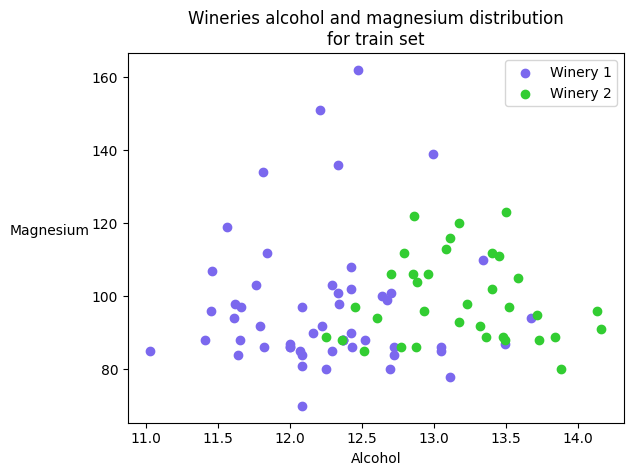

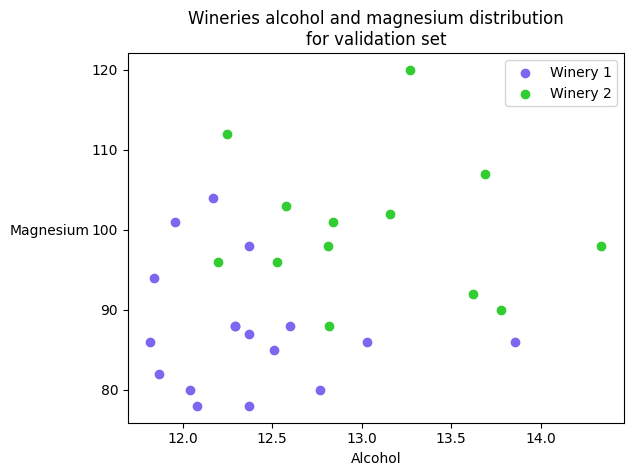

In [33]:
display_scatter(train_df, 'train set')
display_scatter(val_df, 'validation set')

From the above train plot we can infer that the train data is not linearly seperable, hence the Hard SVM algorithm will fail and has no solution.

In [51]:
import numpy as np
from sklearn.datasets import make_blobs

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    # xlim = ax.get_xlim()
    # ylim = ax.get_ylim()
    
    # create grid to evaluate model
    # x = np.linspace(xlim[0], xlim[1], 30)
    # y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=50, linewidth=1, facecolors='none', edgecolor='black');
    # ax.set_xlim(xlim)
    # ax.set_ylim(ylim)


ValueError: not enough values to unpack (expected 2, got 0)

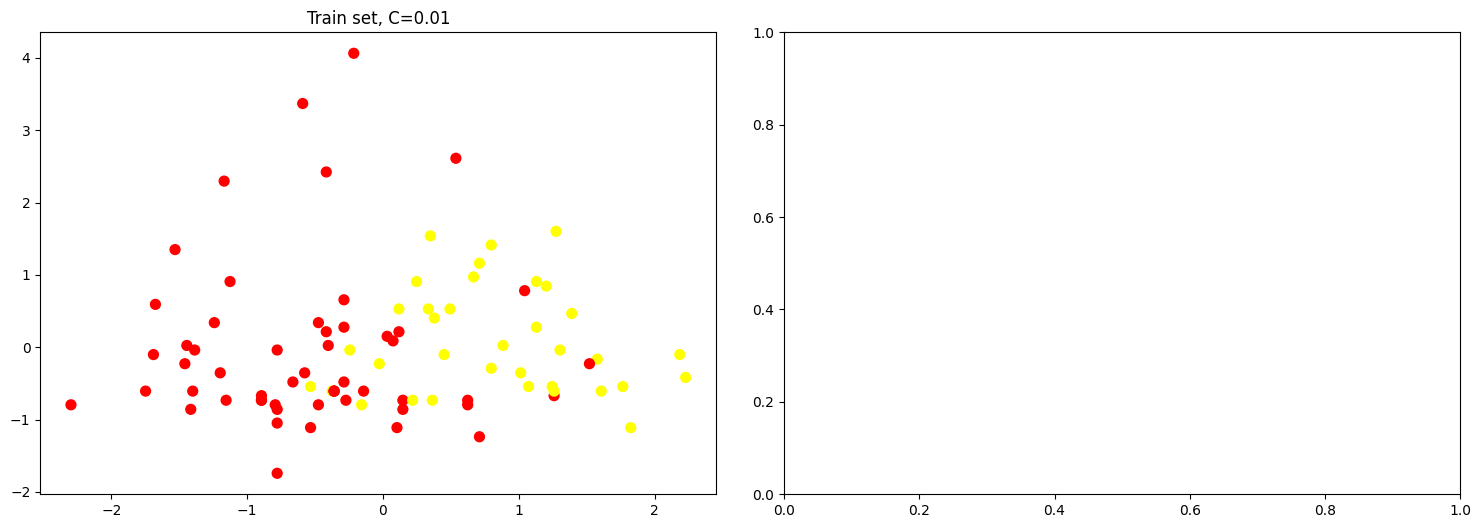

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

for c in [0.01, 0.05, 0.1]:
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

    model = SVC(kernel='linear', C=c)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(train_df[['alcohol', 'magnesium']])
    x_val = scaler.transform(val_df[['alcohol', 'magnesium']])
    y_train = train_df['target']

    model.fit(x_train, y_train)
    y_pred = SVC.predict(model, x_val)

    ax[0].scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='autumn')
    ax[0].set_title('Train set, C=' + str(c))
    plot_svc_decision_function(model, ax[0])
    
    ax[1].scatter(x_val[:, 0], x_val[:, 1], c=y_pred, s=50, cmap='autumn')
    ax[1].set_title('Validation set, C=' + str(c))
    plot_svc_decision_function(model, ax[1])

    print('C:', c, 'Score:', model.score(val_df[['alcohol', 'magnesium']], y_pred))
